# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.dates import DateFormatter
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Creating the list of 10 stocks used for study

In [2]:
tic_ls = ['TSLA', 'TSM', 'AAPL', 'PG', 'AMZN', 'MSFT', 'NIO', 'META', 'AMD', 'NFLX']
tic_ls

['TSLA', 'TSM', 'AAPL', 'PG', 'AMZN', 'MSFT', 'NIO', 'META', 'AMD', 'NFLX']

# Downloading the stock data for stocks for specified date

In [3]:
startdate = pd.to_datetime('2021-09-30').date()
enddate = pd.to_datetime('2022-09-29').date()
tic_df = yf.download(tic_ls[0], start = startdate, end = enddate) #downloading the data for the first stock present in the list 
tic_df['Stock Name'] = tic_ls[0] #adding the column Stock Name having constant value equal to stock name
tic_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Stock Name
Date,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [4]:
for tic in tic_ls[1:]:
    df = yf.download(tic, start = startdate, end = enddate) # downloading the data for each stock in the list
    df['Stock Name'] = tic #adding the column Stock Name having constant value equal to stock name
    tic_df = pd.concat([tic_df, df], axis = 0) #concatenating the dataframes along the rows
    
tic_df = tic_df.dropna(axis = 0, how = 'any') #removing na values
tic_df = tic_df.reset_index() #resetting the index of our dataframe
tic_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [5]:
tic_df['Date'] = pd.to_datetime(tic_df['Date']) #converting the Date to datetime format
tic_df['Date'] = tic_df['Date'].dt.date #extracting the date 
tic_df = tic_df.loc[:,['Date', 'Stock Name','Open','High','Low','Close','Adj Close','Volume']] #changing columns order
tic_df.info()
tic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2510 non-null   object 
 1   Stock Name  2510 non-null   object 
 2   Open        2510 non-null   float64
 3   High        2510 non-null   float64
 4   Low         2510 non-null   float64
 5   Close       2510 non-null   float64
 6   Adj Close   2510 non-null   float64
 7   Volume      2510 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 157.0+ KB


,Date,Stock Name,Open,High,Low,Close,Adj Close,Volume
0,2021-09-30,TSLA,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
1,2021-10-01,TSLA,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2,2021-10-04,TSLA,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
3,2021-10-05,TSLA,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
4,2021-10-06,TSLA,258.733337,262.220001,257.739990,260.916656,260.916656,43898400


In [6]:
tic_df['Stock Name'].value_counts() #looking at the number of instances of each stock

TSLA    251
TSM     251
AAPL    251
PG      251
AMZN    251
MSFT    251
NIO     251
META    251
AMD     251
NFLX    251
Name: Stock Name, dtype: int64

# Plotting the Closing Price of each stocks

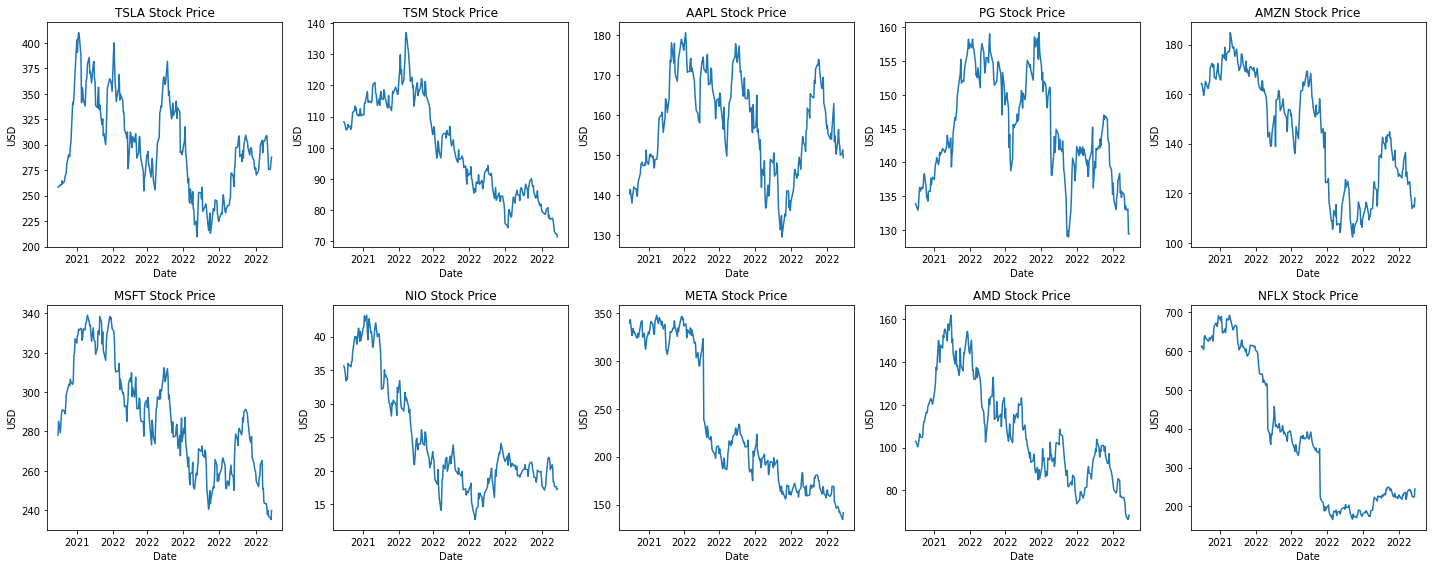

In [7]:
cols = 0
rows = 0 

fig, ax = plt.subplots(2, 5, figsize = (20,8), tight_layout = True)

for tic in tic_ls:
    ax[rows,cols].plot(tic_df.loc[tic_df['Stock Name'] == tic, 'Date'] ,tic_df.loc[tic_df['Stock Name'] == tic,'Adj Close'])
    ax[rows,cols].set(xlabel='Date', ylabel='USD', title=f'{tic} Stock Price')
    ax[rows,cols].xaxis.set_major_formatter(DateFormatter('%Y'))
    cols += 1
    if cols == 5:
        rows = 1
        cols = 0  

plt.show()

# Fitting ARIMA Model

Reference Paper: Forecasting Economics and Financial Time Series: ARIMA vs. LSTM(https://arxiv.org/ftp/arxiv/papers/1803/1803.06386.pdf)

In [8]:
rmse_errors_dic = {} #creating a dictionary to record the rmse for each stock
mae_errors_dic = {} #creating a dictionary to record the mae for each stock
scaler = MinMaxScaler() #creating a scaler object such that feature range is between (0,1)

for tic in tic_ls:
    
    predictions = list()
    
    adj_close_df = tic_df[tic_df['Stock Name'] == tic][['Adj Close']]
    
    stepwise_fit = auto_arima(adj_close_df, trace = True, suppress_warnings = True) #determining (p,d,q) for each stock
    order_tic = stepwise_fit.order
    
    adj_close = adj_close_df.values

    size = int(len(adj_close)*0.85) #determining the length of the training dataset
    train, test = adj_close[0:size], adj_close[size:len(adj_close)] #creating the training and testing dataset
    history = [x for x in train]
    
    model = sm.tsa.arima.ARIMA(history, order = order_tic) #creating the ARIMA model 
    model_fit = model.fit() #fitting the ARIMA model
    predictions = model_fit.forecast(steps = len(test)) #forecasting with ARIMA model
    print(predictions)
    
    rmse_errors_dic[tic] = np.sqrt(mean_squared_error(test, predictions)) #calculating the root mean squared error
    mae_errors_dic[tic] = mean_absolute_error(test, predictions) #calculating the mean absolute error

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1976.331, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1968.459, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.384, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1970.385, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1966.481, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.309 seconds
[308.6333313 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313
 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313
 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313
 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313
 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313
 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313 308.6333313
 308.6333313 308.6333313]
Performing stepwise searc

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2053.739, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2052.825, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2053.765, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2053.718, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2053.326, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2049.750, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2051.703, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2051.710, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2055.512, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2055.689, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2050.006, Time=0.04 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.822 seconds
[231.06139355 230.14036247 230.87712267 230.28776624 230.75921001
 230.38208809 230.68375915 230.44244348 230.63547908 230.48106415
 230.60458525 230.50577704 230.58481667 230.52159052 230.572167
 

In [9]:
rmse_errors_dic

{'TSLA': 19.871012567863353,
 'TSM': 7.6423122329087185,
 'AAPL': 9.045211951080594,
 'PG': 6.04125394307492,
 'AMZN': 14.739410208005788,
 'MSFT': 25.844298872418598,
 'NIO': 1.9796088717399498,
 'META': 16.359566625409897,
 'AMD': 21.158061960959056,
 'NFLX': 9.296020818655306}

In [10]:
mae_errors_dic

{'TSLA': 16.642717060289886,
 'TSM': 6.194888667056435,
 'AAPL': 7.819805346037212,
 'PG': 5.158684981496711,
 'AMZN': 12.008952692935342,
 'MSFT': 21.047625893040706,
 'NIO': 1.608420823749743,
 'META': 12.940268265573602,
 'AMD': 17.97000362998561,
 'NFLX': 7.917333648864798}